In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with MPRester("xAixBxXBVwN8D32SEfC8") as m:
    band_structure = m.get_bandstructure_by_material_id("mp-10378")

Bande interdite directe d'énergie False eV
Bande interdite indirecte d'énergie 0.6126 eV


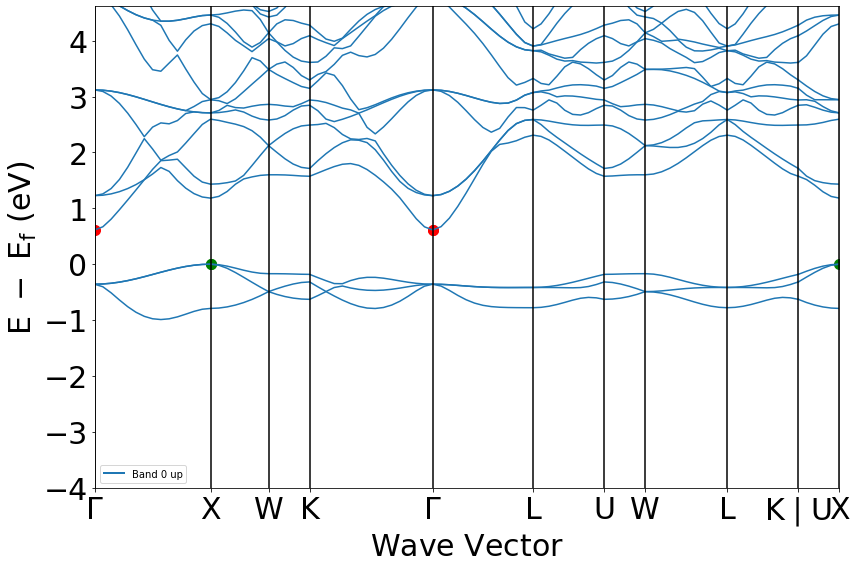

In [8]:
#déterminer la bande interdite
BSPlot = BSPlotter(band_structure)
BSPlot.get_plot(vbm_cbm_marker=True)
BdGap = band_structure.get_band_gap()

#Si la valeur de la bande est "False", c'est qu'elle n'existe pas
print("Bande interdite directe d'énergie", BdGap["direct"], "eV")
print("Bande interdite indirecte d'énergie", BdGap["energy"], "eV")

In [13]:
#trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)
x = data.get('energy')
dataa = BSPlot.bs_plot_data()
distances = dataa.get('ticks').get('distance')
#print(distances)


#sans redondance
new_dist = np.array([distances[0], distances[1], distances[3], distances[5], distances[7], distances[9], distances[11], distances[13], distances[15], distances[17], distances[18]])
#print(new_dist)

[0.0, 0.6719436669631402, 0.6719436669631402, 1.0079155004447102, 1.0079155004447102, 1.245483462187206, 1.245483462187206, 1.9581873474146931, 1.9581873474146931, 2.5401076329168415, 2.5401076329168415, 2.9515874129054245, 2.9515874129054245, 3.18915537464792, 3.18915537464792, 3.6642912981329108, 3.6642912981329108, 4.075771078121495, 4.313339039863992]
[0.         0.67194367 1.0079155  1.24548346 1.95818735 2.54010763
 2.95158741 3.18915537 3.6642913  4.07577108 4.31333904]


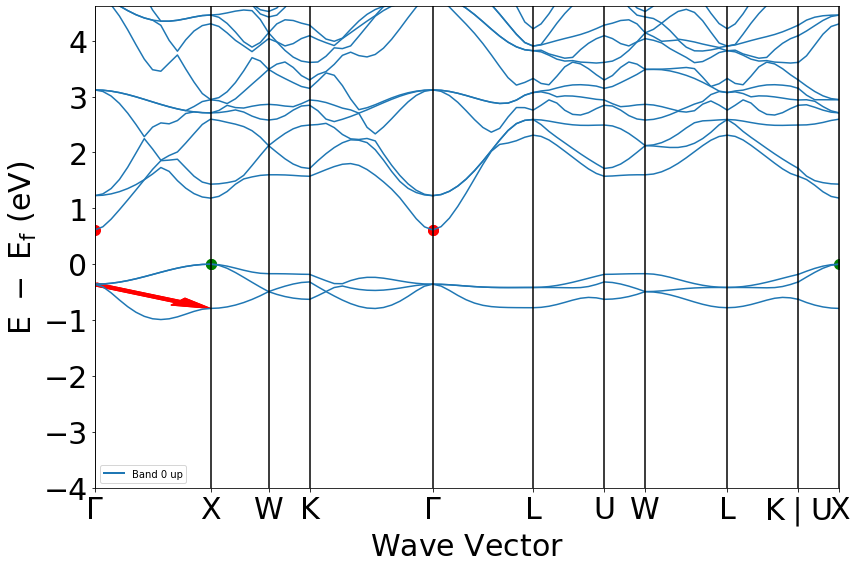

In [24]:
branchdist = new_dist[1:] - new_dist[0:-1]

d = BSPlott.bs_plot_data()
x = d.get('energy')

# etape1
v = np.zeros(np.shape(branchdist))
for i in range(np.size(branchdist)):
    v[i] = ((x.get('1')[i][12][-1]) - (x.get('1')[i][12][0])) / branchdist[i]

v_max = int(np.max(np.abs(v)))
v_min = int(np.min(np.abs(v)))

# etape2
c =  np.zeros(np.shape(branchdist))
for i in range(np.size(branchdist)):
    c[i] = ((x.get('1')[i][13][-1]) - (x.get('1')[i][13][0])) / branchdist[i]

c_max = int(np.max(np.abs(c)))
c_min = int(np.min(np.abs(c)))



data = BSPlot.bs_plot_data()['distances']
energy = BSPlot.bs_plot_data()['energy']
BSPlott.get_plot(vbm_cbm_marker=True)
plt.arrow(data[v_min][0],energy['1'][v_min][12][0],data[v_min][-1]-data[v_min][0],energy['1'][v_min][12][-1]-energy['1'][v_min][12][0],width = 0.05,length_includes_head=True,color='green') 
plt.arrow(data[v_max][0],energy['1'][v_max][12][0],data[v_max][-1]-data[v_max][0],energy['1'][v_max][12][-1]-energy['1'][v_max][12][0],width = 0.05,length_includes_head=True,color='green')
plt.arrow(data[c_min][0],energy['1'][c_min][13][0],data[c_min][-1]-data[c_min][0],energy['1'][c_min][13][-1]-energy['1'][c_min][13][0],width = 0.05,length_includes_head=True,color='red')
plt.arrow(data[c_max][0],energy['1'][c_max][13][0],data[c_max][-1]-data[c_max][0],energy['1'][c_max][13][-1]-energy['1'][c_max][13][0],width = 0.05,length_includes_head=True,color='red')
plt.show()

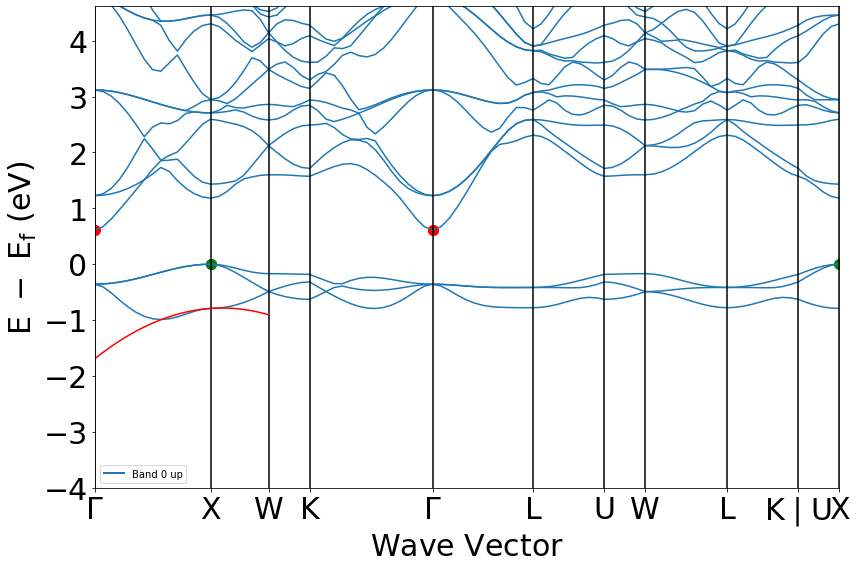

In [29]:
#calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

maxval = BSPlot.bs_plot_data()['vbm']
mincond = BSPlot.bs_plot_data()['cbm']
local_maxval =0
local_mincond =0
for i in range(len(data)):
    if data[i][-1] == 0.67194367: 
        local_maxval = i
    if data[i][-1] == 4.31333904: 
        local_mincond = i
        
        
dist_val = [data[local_maxval][-2], data[local_maxval][-1], data[local_maxval+1][1]]
dist_cond = [data[local_mincond][-2], data[local_mincond][-1], data[local_mincond+1][1]]

energy_val = [energy['1'][local_maxval][12][-2],energy['1'][local_maxval][12][-1],energy['1'][local_maxval+1][12][1]]
energy_cond = [energy['1'][local_mincond][13][-2],energy['1'][local_mincond][13][-1],energy['1'][local_mincond+1][13][1]]

coeff_val = np.polyfit(dist_val, energy_val, 2)
coeff_cond= np.polyfit(dist_cond, energy_cond, 2)

k_val = np.linspace(data[local_maxval][0], data[local_maxval+1][-1], 100)
k_cond = np.linspace(data[local_mincond][0], data[local_mincond+1][-1], 100)

BSPlot.get_plot(vbm_cbm_marker=True)
plt.plot(k_val, coeff_val[0]*k_val**2 + coeff_val[1]*k_val + coeff_val[2], color='green')
plt.plot(k_cond, coeff_cond[0]*k_cond**2 + coeff_cond[1]*k_cond + coeff_cond[2], color='red')
plt.show()
